In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import statistics 
from itertools import islice 

# Simple Matching Coefficient
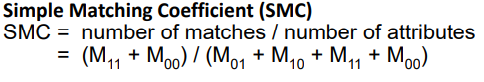

In [3]:
#DEFINITION OF FUNCTION
def similiarity(p,q,test):
    M01, M10, M11, M00 = 0,0,0,0
    if len(p) == len(q):
        for i in range(len(p)):
            if p[i] == q[i] and p[i] == 0:
                M00+=1
            elif p[i] == q[i] and p[i] == 1:
                M11+=1
            elif p[i] != q[i] and p[i] == 0:
                M01+=1
            else:
                M10+=1
        
        if test.lower() == "smc":
            return (M11+M00)/(M01+M10+M11+M00)
        elif test.lower() == "jac":
            return M11/(M01+M10+M11)
        else:
            return "Wrong Test Name"
    else:
        return "P and Q not same length"

In [4]:
#RUN TEST HERE
p = np.array([0,1,0,1,0])
q = np.array([0,1,0,0,0])
test = "smc"

print(similiarity(p,q,test))

0.8


# Jaccard Coeffiecient
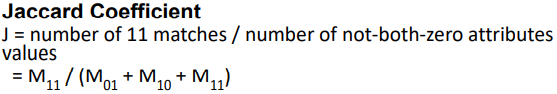

In [5]:
#RUN TEST HERE
p = np.array([1,0,0,1,1,0,0])
q = np.array([0,0,0,1,1,1,0])
test = "jac"

print(similiarity(p,q,test))

0.5


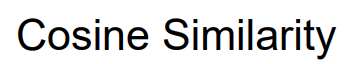

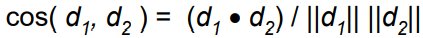

In [16]:
#DEFINITION OF FUNCTION
def cos_similiarity(d1,d2):
    if len(d1) == len(d1):
        value = np.dot(d1,d2)/np.sqrt(np.sum(np.square(d1))*np.sum(np.square(d2)))
        if np.isnan(value):
            return 0
        return value
    else:
        return "P and Q not same length"

# Pearson_Correlation

In [8]:
#RUN TEST HERE
d = {}
d["d1"] = [1,0,3,0,0,5,0,0,5,0,4,0]
d["d2"] = [0,0,5,4,0,5,5,0,0,4,4,5]
d["d3"] = [2,4,0,1,2,0,3,0,4,3,5,0]
d["d4"] = [0,2,4,0,5,0,0,4,0,0,2,0]
d["d5"] = [0,0,4,3,4,2,0,0,0,0,0,5]
d["d6"] = [1,0,3,0,3,0,0,2,0,0,0,0]
d["d7"] = [0,0,3,0,3,0,0,4,4,0,0,0]
d["d8"] = [0,0,4,0,0,4,0,1,2,0,3,0]
d["d9"] = [4,0,1,2,0,5,0,0,2,0,0,0]
d["d10"] = [2,2,0,2,0,0,0,0,3,3,3,0]
d["d11"] = [0,4,3,0,3,0,0,0,1,2,0,0]
d["d12"] = [0,0,3,0,3,0,0,2,0,0,4,0]

In [9]:
t = {}
idx = len(d["d1"])
for i in range(idx):
    value = []
    for key, item in d.items():
        value.append(item[i])
    t["d"+str(i+1)] = value

In [10]:
t

{'d1': [1, 0, 2, 0, 0, 1, 0, 0, 4, 2, 0, 0],
 'd2': [0, 0, 4, 2, 0, 0, 0, 0, 0, 2, 4, 0],
 'd3': [3, 5, 0, 4, 4, 3, 3, 4, 1, 0, 3, 3],
 'd4': [0, 4, 1, 0, 3, 0, 0, 0, 2, 2, 0, 0],
 'd5': [0, 0, 2, 5, 4, 3, 3, 0, 0, 0, 3, 3],
 'd6': [5, 5, 0, 0, 2, 0, 0, 4, 5, 0, 0, 0],
 'd7': [0, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'd8': [0, 0, 0, 4, 0, 2, 4, 1, 0, 0, 0, 2],
 'd9': [5, 0, 4, 0, 0, 0, 4, 2, 2, 3, 1, 0],
 'd10': [0, 4, 3, 0, 0, 0, 0, 0, 0, 3, 2, 0],
 'd11': [4, 4, 5, 2, 0, 0, 0, 3, 0, 3, 0, 4],
 'd12': [0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0]}

In [11]:
def pearson_correlation(data, n, movieidx, useridx):
    sig = 4
    
    #Do Subtraction and save data in p dictionary
    p = {}
    for key, item in data.items():
        value = 0
        count = 0
        result = []
        for i in item:
            if i != 0:
                value+=i
                count+=1
                
        for k in item:
            if k != 0:
                result.append(k-value/count)
            else:
                result.append(0)
            p[key] = [round(k,sig) for k in result]
    
    #Calculate Cosine similiarity
    cos = []
    for key, item in p.items():
        cos.append(round(cos_similiarity(p["d"+str(movieidx)],p[key]),sig))
    p["cos_sim"] = cos
    
    #print p dict
    print(f"Subtract mean with each row")
    for key,item in p.items():
        print(f"{key} {item}\n")
    
    #Sort Cosine Similiarity ranking
    idx = sorted(range(len(p["cos_sim"])),reverse=True,key=lambda i: p["cos_sim"][i])[1:]
    print(f"NN according to index - {[x+1 for x in idx]}\n")
    
    #Re-sort Ranking for choosen row also with no value
    deno = 0
    numer = 0
    cosidx = []
    for j in idx:
        if(d["d"+str(j+1)][useridx-1] != 0):
            numer += p["cos_sim"][j] * data["d"+str(j+1)][useridx-1]
            deno += p["cos_sim"][j]
            cosidx.append(j)
        if len(cosidx) == n:
            break
            
    print(f"Highest {n} Cos Sim Movie is (Start from index 1) - {[i+1 for i in cosidx]}\n")
    print(f"Predicted Weighted average for Matrix (Movie{movieidx}, User{useridx}) - {numer/deno}")
    
    return numer/deno

In [21]:
# #FOR ITEM-ITEM
pearson_correlation(d, n=3, movieidx=1, useridx=2)

# FOR USER-USER (SWITCH VALUE FOR MOVIEIDX AND USERIDX)
# pearson_correlation(t, n=3, movieidx=2, useridx=1)

Subtract mean with each row
d1 [-2.6, 0, -0.6, 0, 0, 1.4, 0, 0, 1.4, 0, 0.4, 0]

d2 [0, 0, 0.4286, -0.5714, 0, 0.4286, 0.4286, 0, 0, -0.5714, -0.5714, 0.4286]

d3 [-1.0, 1.0, 0, -2.0, -1.0, 0, 0.0, 0, 1.0, 0.0, 2.0, 0]

d4 [0, -1.4, 0.6, 0, 1.6, 0, 0, 0.6, 0, 0, -1.4, 0]

d5 [0, 0, 0.4, -0.6, 0.4, -1.6, 0, 0, 0, 0, 0, 1.4]

d6 [-1.25, 0, 0.75, 0, 0.75, 0, 0, -0.25, 0, 0, 0, 0]

d7 [0, 0, -0.5, 0, -0.5, 0, 0, 0.5, 0.5, 0, 0, 0]

d8 [0, 0, 1.2, 0, 0, 1.2, 0, -1.8, -0.8, 0, 0.2, 0]

d9 [1.2, 0, -1.8, -0.8, 0, 2.2, 0, 0, -0.8, 0, 0, 0]

d10 [-0.5, -0.5, 0, -0.5, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0]

d11 [0, 1.4, 0.4, 0, 0.4, 0, 0, 0, -1.6, -0.6, 0, 0]

d12 [0, 0, 0.0, 0, 0.0, 0, 0, -1.0, 0, 0, 1.0, 0]

cos_sim [1.0, 0.0261, 0.414, -0.1025, -0.325, 0.5045, 0.2988, -0.0092, -0.0073, 0.5367, -0.325, 0.0845]

NN according to index - [10, 6, 3, 7, 12, 2, 9, 8, 4, 5, 11]

Highest 3 Cos Sim Movie is (Start from index 1) - [10, 3, 4]

Predicted Weighted average for Matrix (Movie1, User2) - 2.976184862060

2.976184862060835